<a href="https://colab.research.google.com/github/Mohammad-Amin-Jenadele/Autoencoder-Anomaly-Detection-on-Imbalanced-Heart-Disease-Dataset/blob/dev/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models , optimizers
import pandas as pf
import matplotlib.pyplot as plt
import pandas as pd
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
!mkdir -p /root/.config/kaggle/
!cp kaggle.json /root/.config/kaggle/
!chmod 600 /root/.config/kaggle/kaggle.json

In [4]:
# Ensure the Kaggle API is authenticated
api = KaggleApi()
api.authenticate()

# Define the dataset you want to download
dataset_name = 'kamilpytlak/personal-key-indicators-of-heart-disease'

# Download the dataset
api.dataset_download_files(dataset_name, path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


In [5]:
# loading the dataset
dataset_path = '/content/data/2020/heart_2020_cleaned.csv'
dataset = pd.read_csv(dataset_path)

In [6]:
dataset.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


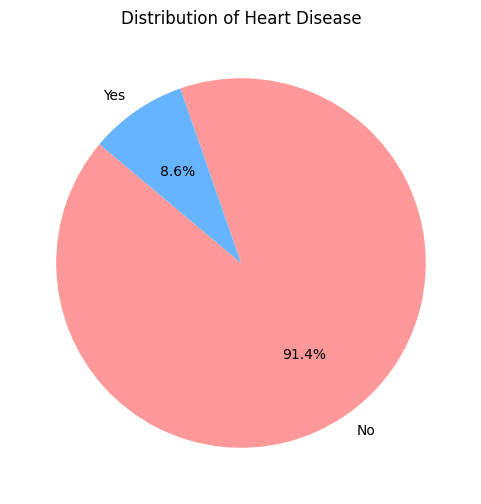

In [8]:
# Displaying the heart disease distribution
counts = dataset['HeartDisease'].value_counts()
percentages = counts / counts.sum() * 100
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999','#66b3ff']
)
plt.title("Distribution of Heart Disease")
plt.show()

In [9]:
# Replace "Yes" with 1 and "No" with 0 in specific columns
dataset['HeartDisease'] = dataset['HeartDisease'].replace({'Yes': 1, 'No': 0})
dataset['Smoking'] = dataset['Smoking'].replace({'Yes': 1, 'No': 0})
dataset['AlcoholDrinking'] = dataset['AlcoholDrinking'].replace({'Yes': 1, 'No': 0})
dataset['Stroke'] = dataset['Stroke'].replace({'Yes': 1, 'No': 0})
dataset['DiffWalking'] = dataset['DiffWalking'].replace({'Yes': 1, 'No': 0})
dataset['Sex'] = dataset['Sex'].replace({'Male': 1, 'Female': 0})
dataset['Diabetic'] = dataset['Diabetic'].replace({'Yes': 1, 'No': 0})
dataset['PhysicalActivity'] = dataset['PhysicalActivity'].replace({'Yes': 1, 'No': 0})
dataset['Asthma'] = dataset['Asthma'].replace({'Yes': 1, 'No': 0})
dataset['KidneyDisease'] = dataset['KidneyDisease'].replace({'Yes': 1, 'No': 0})
dataset['SkinCancer'] = dataset['SkinCancer'].replace({'Yes': 1, 'No': 0})

<ipython-input-9-2323b0f2f828>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['HeartDisease'] = dataset['HeartDisease'].replace({'Yes': 1, 'No': 0})
<ipython-input-9-2323b0f2f828>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Smoking'] = dataset['Smoking'].replace({'Yes': 1, 'No': 0})
<ipython-input-9-2323b0f2f828>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in 

In [10]:
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [11]:
categorical_columns = ['AgeCategory' , 'Race' , 'GenHealth' , 'Diabetic']
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=False)
boolean_columns = dataset.select_dtypes(include='bool').columns
dataset[boolean_columns] = dataset[boolean_columns].astype(int)

In [12]:
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_0,Diabetic_1,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,1,0,1,0,0,0,0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [14]:
dataset.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'Diabetic_0', 'Diabetic_1',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes (during pregnancy)'],
      dtype='object')

In [13]:
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_0,Diabetic_1,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy)
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
# dataset split : For no disease 80% train , 10% validataion and 10% test
# x_anomaly = concat(has_disease , x_valid , x_test)
no_disease = dataset[dataset['HeartDisease'] == 0]
has_disease = dataset[dataset['HeartDisease'] == 1]
x_train, x_temp = train_test_split(no_disease, test_size=0.20)
x_valid, x_test = train_test_split(x_temp, test_size=0.50)
x_contains_anomaly = pd.concat([x_test, has_disease], ignore_index=True)
x_train = x_train.drop(columns=['HeartDisease'])
x_valid = x_valid.drop(columns=['HeartDisease'])
x_test = x_test.drop(columns=['HeartDisease'])
print(f"x_train size: {x_train.shape}")
print(f"x_valid size: {x_valid.shape}")
print(f"x_test size: {x_test.shape}")
print(f"x_contains_anomaly size: {x_contains_anomaly.shape}")

x_train size: (233937, 41)
x_valid size: (29242, 41)
x_test size: (29243, 41)
x_contains_anomaly size: (56616, 42)


In [16]:
autoencoder = models.Sequential([
    # Encoder
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(16, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Decoder
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Output layer: reconstructing the original input
    layers.Dense(x_train.shape[1], activation="linear")
])

# Display the model summary
autoencoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 34,361 (134.22 KB)

 Trainable params: 33,433 (130.60 KB)

 Non-trainable params: 928 (3.62 KB)

In [17]:
autoencoder.compile(
    optimizer=optimizers.Adam(learning_rate=3e-4),  # You can adjust the learning rate if needed
    loss=keras.losses.MeanSquaredError()  # Use Mean Squared Error for reconstruction loss
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=100,          # Number of epochs to wait for improvement before stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

In [19]:
history = autoencoder.fit(
    x_train,
    x_train,
    epochs=1000,
    batch_size=1024,
    validation_data=(x_valid, x_valid),
    shuffle=True ,
   callbacks=[early_stopping]
)

Epoch 1/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - loss: 1.1976 - val_loss: 0.1121
Epoch 2/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3525 - val_loss: 0.0835
Epoch 3/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2131 - val_loss: 0.0747
Epoch 4/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1550 - val_loss: 0.0706
Epoch 5/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1216 - val_loss: 0.0672
Epoch 6/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1003 - val_loss: 0.0641
Epoch 7/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0864 - val_loss: 0.0613
Epoch 8/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0775 - val_loss: 0.0595
Epoch 9/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0718 - val_loss: 0.0583
Epoch 10/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0684 - val_loss: 0.0572
Epoch 11/1000
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0662 - val_loss: 0.0564
Epoch 12/1000
229/229 ━━━━━━

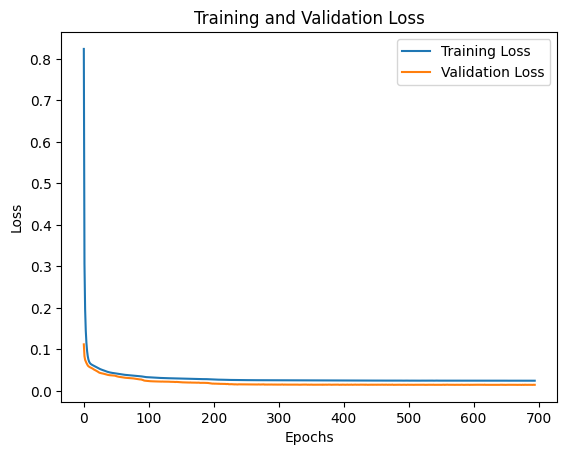

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
autoencoder.save('autoencoder_model.h5')

In [22]:
autoencoder = models.load_model('/content/autoencoder_model.h5')